# Multiple Linear Regression- Bike Sharing

# Problem Statement:
Building a multiple linear regression model for the prediction of demand for shared bikes. 


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the bike sharing dataset

In [394]:
import numpy as np
import pandas as pd

In [395]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [396]:
bike = pd.read_csv("day.csv")

In [397]:
# Check the head of the dataset
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [398]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


In [399]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [400]:
bike.shape

(730, 16)

In [401]:
bike.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

# Step 2: Visualising the Data

In [402]:
import matplotlib.pyplot as plt
import seaborn as sns

# #Numerical variables and their correlation

In [403]:
bike_num=pd.DataFrame(bike,columns=['cnt','temp','atemp', 'hum','windspeed','casual' ,'registered'])

In [404]:
bike_num.head()

,cnt,temp,atemp,hum,windspeed,casual,registered
0,985,14.110847,18.18125,80.5833,10.749882,331,654
1,801,14.902598,17.68695,69.6087,16.652113,131,670
2,1349,8.050924,9.47025,43.7273,16.636703,120,1229
3,1562,8.200000,10.60610,59.0435,10.739832,108,1454
4,1600,9.305237,11.46350,43.6957,12.522300,82,1518


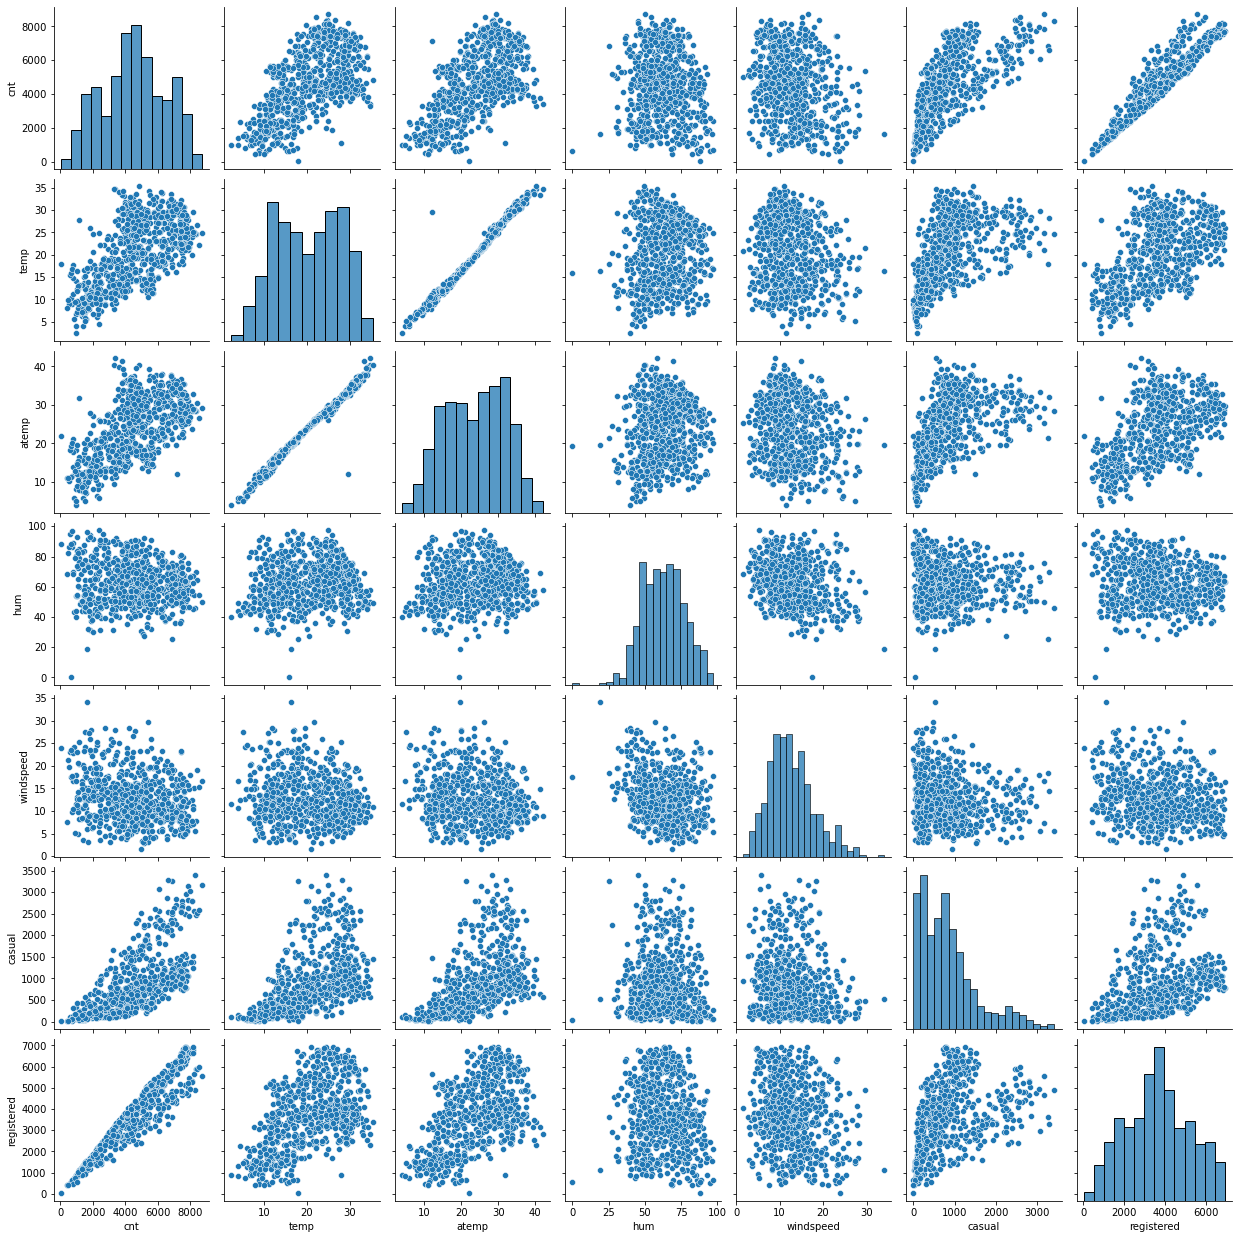

In [405]:
sns.pairplot(bike_num)
plt.show()

We can find the variables temp and atemp following a strong linear pattern.We will further enquire this in heatmap.The patterns of other variables are not exhibitting strong patterns.

# #Categorical variables and their correlation

In [406]:
#Changing month variable from numeric to categorical
import calendar
bike['mnth']=bike['mnth'].apply(lambda x:calendar.month_abbr[x])

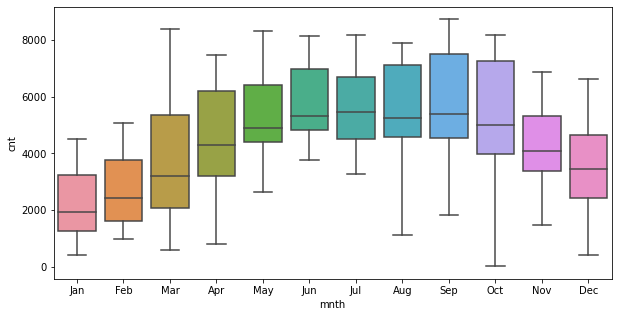

In [407]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()

In [408]:
#Converting all possible categorical variables to desired format

In [409]:
bike['weekday'] = bike['weekday'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})

In [410]:
bike['season'] = bike['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [411]:
bike['weathersit'] = bike['weathersit'].map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Rain'})

In [412]:
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Wednesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Thursday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Friday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Saturday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,Spring,0,Jan,0,Sunday,0,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,Spring,0,Jan,0,Monday,0,Mist & Cloudy,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,Spring,0,Jan,0,Tuesday,1,Mist & Cloudy,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,Spring,0,Jan,0,Wednesday,1,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,Spring,0,Jan,0,Thursday,1,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# #Analysing categorical variables using pairplot

# 

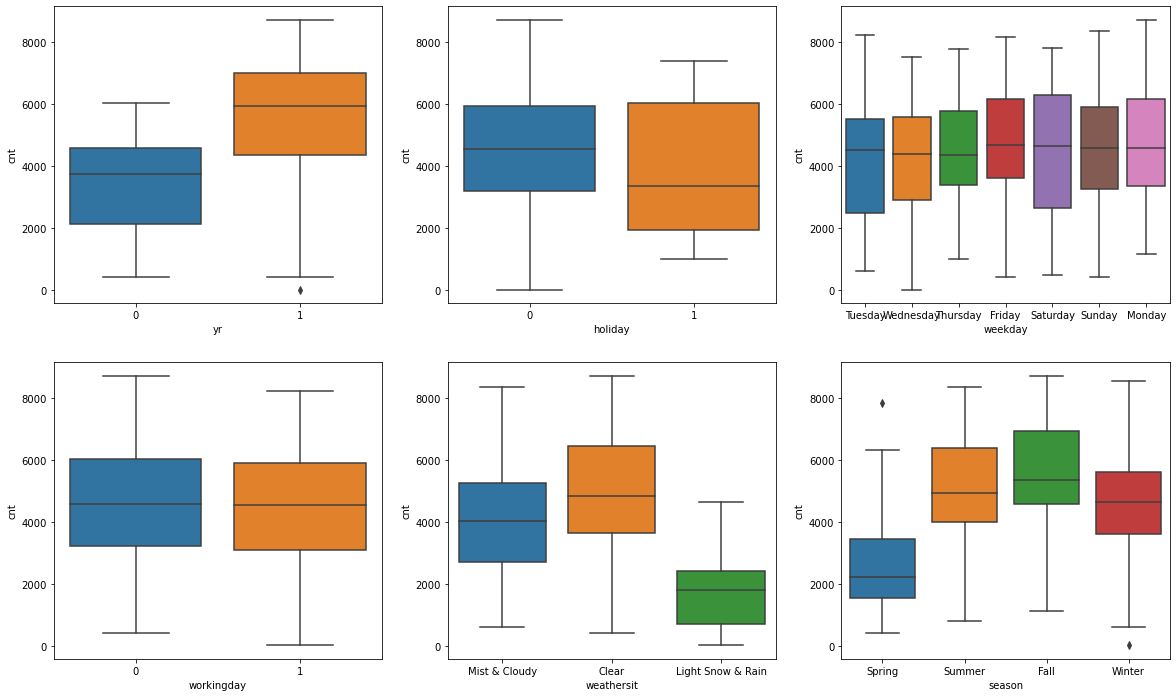

In [413]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data =bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.show()

The year variables and season variables show most variations to the target variable count.
There is no much effect on count due to weekday variables.

# ##Creating dummy variables

In [414]:
dummy_var =bike[['season','mnth','weekday','weathersit']]
dummy_var = pd.get_dummies(dummy_var)


In [415]:
dummy_var = pd.get_dummies(dummy_var,drop_first=True )

In [416]:
bike= pd.concat([dummy_var,bike],axis = 1)

In [417]:
bike.head()

,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0,0,0,0,0,0,1,0,...,Tuesday,1,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,0,1,0,0,0,0,0,0,1,0,...,Wednesday,1,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,0,1,0,0,0,0,0,0,1,0,...,Thursday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,0,1,0,0,0,0,0,0,1,0,...,Friday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,0,1,0,0,0,0,0,0,1,0,...,Saturday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Finding correlation among numeric variables 

In [418]:
(bike_num).corr()

,cnt,temp,atemp,hum,windspeed,casual,registered
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411
temp,0.627044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914
casual,0.672123,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137
registered,0.945411,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000


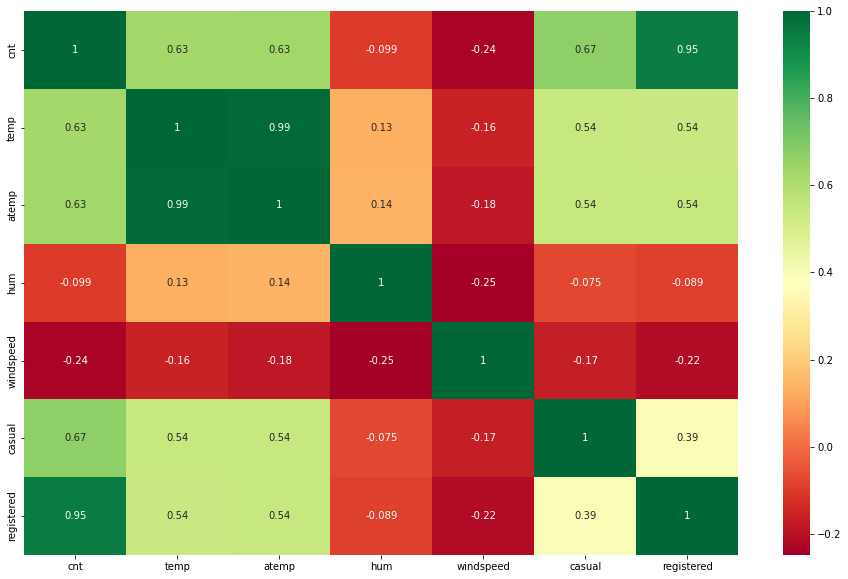

In [419]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn")
plt.show()

The highly correlated variables are removed to avoid multi-collinearity.atemp is removed ,while temp is kept as such.
Since cnt variable is a total of casual and registered, the latter are removed.
Instant and Dteday do not add any value to model, hence dropped
The variables for which dummy are created is removed.

# ##Dropping unwanted columns

In [420]:
# Drop columns 
bike=bike.drop(columns=['mnth','season','instant', 'dteday','weekday','weathersit','casual','registered','atemp'])#atemp

In [421]:
bike.head()

,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
0,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,14.110847,80.5833,10.749882,985
1,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,14.902598,69.6087,16.652113,801
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


# Splitting into train and test

In [422]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test =train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling


In [423]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [424]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
scal_var = ['temp','hum','windspeed','cnt']#atemp

bike_train[scal_var] = scaler.fit_transform(bike_train[scal_var])

In [425]:
bike_train.head()

,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
653,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0.509887,0.575354,0.300794,0.864243
576,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0.815169,0.725633,0.264686,0.827658
426,0,1,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0.442393,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,1,0,0,0,...,1,0,0,1,0,1,0.245101,0.498067,0.663106,0.204096
482,0,0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0.395666,0.504508,0.188475,0.482973


In [426]:
bike_train.describe()

,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.262745,0.243137,0.245098,0.24902,0.078431,0.096078,0.084314,0.066667,0.088235,0.076471,...,0.627451,0.029412,0.343137,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620
std,0.440557,0.429398,0.430568,0.43287,0.269113,0.294988,0.278131,0.249689,0.283915,0.266010,...,0.483958,0.169124,0.475223,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


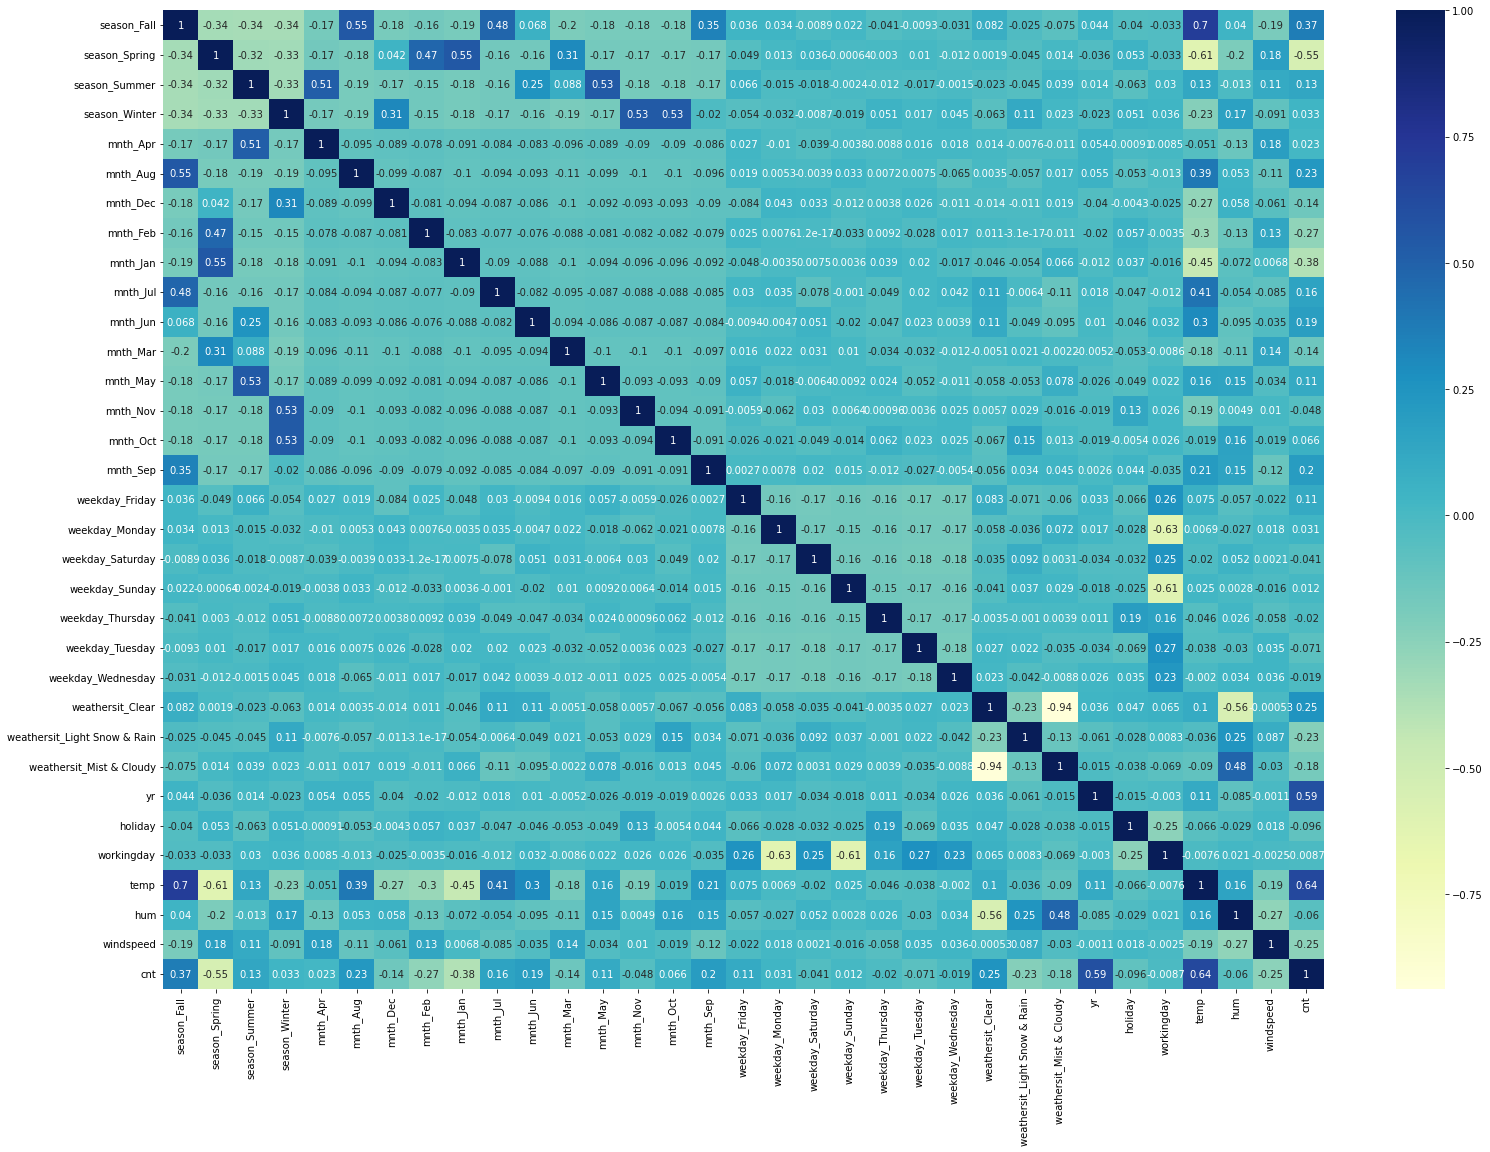

In [427]:
#Analysing correlation between variables to be included in the model
plt.figure(figsize = (26, 18))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Based on the correlation values the variables can be included in the model depending on significance

# Applying RFE

In [428]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [429]:
# Running RFE with the output number of the variable equal to 10
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [430]:
# running RFE
rfe = RFE(lm, 10)             
rfe = rfe.fit(X_train, y_train)

In [431]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Fall', False, 15),
 ('season_Spring', False, 17),
 ('season_Summer', False, 16),
 ('season_Winter', False, 14),
 ('mnth_Apr', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 6),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', True, 1),
 ('mnth_Mar', False, 3),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', True, 1),
 ('mnth_Sep', True, 1),
 ('weekday_Friday', False, 8),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', False, 10),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 11),
 ('weekday_Tuesday', False, 13),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', False, 19),
 ('holiday', False, 22),
 ('workingday', False, 23),
 ('temp', False, 18),
 ('hum', False, 21),
 ('windspeed', False, 20)]

In [432]:
rfe_select = X_train.columns[rfe.support_]
rfe_select

Index(['mnth_Apr', 'mnth_Aug', 'mnth_Jul', 'mnth_Jun', 'mnth_May', 'mnth_Oct',
       'mnth_Sep', 'weathersit_Clear', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy'],
      dtype='object')

In [433]:
X_train.columns[~rfe.support_]


Index(['season_Fall', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Mar', 'mnth_Nov',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [434]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[rfe_select]

# ### Building model using statsmodel, for the detailed statistics

In [435]:
# ### Building model using statsmodel, for the detailed statistics

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

lm.params

#Let's see the summary of our linear model
print(lm.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     38.61
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           4.99e-52
Time:                        18:41:15   Log-Likelihood:                 173.08
No. Observations:                 510   AIC:                            -326.2
Df Residuals:                     500   BIC:                            -283.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

Since rfe model does not give expected r2 values , we will build model adding variables recursively

# Building model adding variables

In [436]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['yr']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [437]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):           1.89e-49
Time:                        18:41:16   Log-Likelihood:                 148.31
No. Observations:                 510   AIC:                            -292.6
Df Residuals:                     508   BIC:                            -284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.108      0.000       0.356       0.401
yr             0.2655      0.016     16.535      0.000       0.234       0.297
==============================================================================
Omnibus:                       27.294   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.137
Skew:                          -0.559   Prob(JB):                     4.71e-07
Kurtosis:                       2.652   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [438]:
lr.params

const    0.378803
yr       0.265469
dtype: float64

In [439]:
# Assign all the feature variables to X
X_train_lm = X_train[['yr', 'temp']]

In [440]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr2 = sm.OLS(y_train, X_train_lm).fit()

lr2.params

const    0.079628
yr       0.237213
temp     0.583559
dtype: float64

In [441]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          9.25e-130
Time:                        18:41:16   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -668.8
Df Residuals:                     507   BIC:                            -656.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0796      0.015      5.331      0.000       0.050       0.109
yr             0.2372      0.011     21.261      0.000       0.215       0.259
temp           0.5836      0.025     23.604      0.000       0.535       0.632
==============================================================================
Omnibus:                       31.402   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.724
Skew:                          -0.503   Prob(JB):                     5.28e-10
Kurtosis:                       4.000   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [442]:
X_train_lm = X_train[['yr', 'temp','windspeed']]

In [443]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr3 = sm.OLS(y_train, X_train_lm).fit()

lr3.params

const        0.157022
yr           0.238494
temp         0.555578
windspeed   -0.196438
dtype: float64

In [444]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     416.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.84e-136
Time:                        18:41:17   Log-Likelihood:                 355.52
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     506   BIC:                            -686.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1570      0.019      8.177      0.000       0.119       0.195
yr             0.2385      0.011     22.124      0.000       0.217       0.260
temp           0.5556      0.024     22.847      0.000       0.508       0.603
windspeed     -0.1964      0.032     -6.109      0.000      -0.260      -0.133
==============================================================================
Omnibus:                       23.079   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.405
Skew:                          -0.433   Prob(JB):                     6.79e-07
Kurtosis:                       3.767   Cond. No.                         8.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [445]:
X_train_lm = X_train[['yr', 'temp','windspeed','holiday','hum']]

In [446]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr4 = sm.OLS(y_train, X_train_lm).fit()

lr4.params

const        0.327340
yr           0.231415
temp         0.571011
windspeed   -0.246773
holiday     -0.073262
hum         -0.241403
dtype: float64

In [447]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     281.3
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.79e-143
Time:                        18:41:17   Log-Likelihood:                 378.31
No. Observations:                 510   AIC:                            -744.6
Df Residuals:                     504   BIC:                            -719.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3273      0.032     10.379      0.000       0.265       0.389
yr             0.2314      0.010     22.286      0.000       0.211       0.252
temp           0.5710      0.024     24.279      0.000       0.525       0.617
windspeed     -0.2468      0.032     -7.766      0.000      -0.309      -0.184
holiday       -0.0733      0.033     -2.244      0.025      -0.137      -0.009
hum           -0.2414      0.037     -6.529      0.000      -0.314      -0.169
==============================================================================
Omnibus:                       17.032   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.733
Skew:                          -0.367   Prob(JB):                     5.19e-05
Kurtosis:                       3.625   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [448]:
X_train_lm = X_train[['yr', 'temp','windspeed','holiday','hum','workingday']]

In [449]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr5 = sm.OLS(y_train, X_train_lm).fit()

lr5.params

const         0.332357
yr            0.231400
temp          0.570639
windspeed    -0.246742
holiday      -0.078355
hum          -0.241022
workingday   -0.006936
dtype: float64

In [450]:
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     234.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          4.13e-142
Time:                        18:41:18   Log-Likelihood:                 378.49
No. Observations:                 510   AIC:                            -743.0
Df Residuals:                     503   BIC:                            -713.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3324      0.033     10.170      0.000       0.268       0.397
yr             0.2314      0.010     22.271      0.000       0.211       0.252
temp           0.5706      0.024     24.238      0.000       0.524       0.617
windspeed     -0.2467      0.032     -7.760      0.000      -0.309      -0.184
holiday       -0.0784      0.034     -2.319      0.021      -0.145      -0.012
hum           -0.2410      0.037     -6.513      0.000      -0.314      -0.168
workingday    -0.0069      0.012     -0.591      0.555      -0.030       0.016
==============================================================================
Omnibus:                       17.868   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.494
Skew:                          -0.385   Prob(JB):                     3.55e-05
Kurtosis:                       3.610   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Checking Vif

In [451]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [452]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.48
3,windspeed,1.10
5,hum,1.10
2,temp,1.07
4,holiday,1.07
6,workingday,1.07
1,yr,1.02


In [453]:
X_train_lm = X_train[['yr', 'temp','workingday']]

In [454]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr6 = sm.OLS(y_train, X_train_lm).fit()

lr6.params

const         0.080575
yr            0.237211
temp          0.583539
workingday   -0.001313
dtype: float64

In [455]:
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     375.9
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.47e-128
Time:                        18:41:18   Log-Likelihood:                 337.38
No. Observations:                 510   AIC:                            -666.8
Df Residuals:                     506   BIC:                            -649.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0806      0.017      4.640      0.000       0.046       0.115
yr             0.2372      0.011     21.240      0.000       0.215       0.259
temp           0.5835      0.025     23.580      0.000       0.535       0.632
workingday    -0.0013      0.012     -0.107      0.915      -0.025       0.023
==============================================================================
Omnibus:                       31.419   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.592
Skew:                          -0.504   Prob(JB):                     5.64e-10
Kurtosis:                       3.993   Cond. No.                         7.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [456]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,9.79
1,yr,1.01
2,temp,1.01
3,workingday,1.00


In [457]:
X_train_lm = X_train[['yr', 'temp','weathersit_Clear']]
#'season_Fall

In [458]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr7 = sm.OLS(y_train, X_train_lm).fit()

lr7.params

const               0.038936
yr                  0.235183
temp                0.566454
weathersit_Clear    0.081142
dtype: float64

In [459]:
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     434.8
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.31e-139
Time:                        18:41:19   Log-Likelihood:                 363.57
No. Observations:                 510   AIC:                            -719.1
Df Residuals:                     506   BIC:                            -702.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0389      0.015      2.556      0.011       0.009       0.069
yr                   0.2352      0.011     22.161      0.000       0.214       0.256
temp                 0.5665      0.024     23.981      0.000       0.520       0.613
weathersit_Clear     0.0811      0.011      7.399      0.000       0.060       0.103
==============================================================================
Omnibus:                       26.870   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.972
Skew:                          -0.451   Prob(JB):                     1.54e-08
Kurtosis:                       3.938   Cond. No.                         7.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [460]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.34
2,temp,1.02
1,yr,1.01
3,weathersit_Clear,1.01


In [461]:

X_train_lm = X_train[['yr', 'temp','windspeed','holiday','hum','workingday','weathersit_Clear']]

In [462]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr8= sm.OLS(y_train, X_train_lm).fit()

lr8.params

const               0.209019
yr                  0.233681
temp                0.544314
windspeed          -0.220933
holiday            -0.092324
hum                -0.101127
workingday         -0.013837
weathersit_Clear    0.067460
dtype: float64

In [463]:
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     214.7
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.74e-146
Time:                        18:41:20   Log-Likelihood:                 391.59
No. Observations:                 510   AIC:                            -767.2
Df Residuals:                     502   BIC:                            -733.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2090      0.040      5.239      0.000       0.131       0.287
yr                   0.2337      0.010     23.030      0.000       0.214       0.254
temp                 0.5443      0.024     23.131      0.000       0.498       0.591
windspeed           -0.2209      0.031     -7.031      0.000      -0.283      -0.159
holiday             -0.0923      0.033     -2.791      0.005      -0.157      -0.027
hum                 -0.1011      0.045     -2.237      0.026      -0.190      -0.012
workingday          -0.0138      0.012     -1.201      0.230      -0.036       0.009
weathersit_Clear     0.0675      0.013      5.144      0.000       0.042       0.093
==============================================================================
Omnibus:                       18.902   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.356
Skew:                          -0.388   Prob(JB):                     1.40e-05
Kurtosis:                       3.672   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [464]:
X_train_lm = X_train[['yr', 'temp','windspeed','holiday','hum','weathersit_Clear']]

In [465]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr9= sm.OLS(y_train, X_train_lm).fit()

lr9.params

const               0.202498
yr                  0.233649
temp                0.545763
windspeed          -0.221696
holiday            -0.081923
hum                -0.105678
weathersit_Clear    0.065627
dtype: float64

In [466]:
lr9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     250.0
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.16e-147
Time:                        18:41:20   Log-Likelihood:                 390.85
No. Observations:                 510   AIC:                            -767.7
Df Residuals:                     503   BIC:                            -738.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2025      0.040      5.121      0.000       0.125       0.280
yr                   0.2336      0.010     23.017      0.000       0.214       0.254
temp                 0.5458      0.024     23.213      0.000       0.500       0.592
windspeed           -0.2217      0.031     -7.053      0.000      -0.283      -0.160
holiday             -0.0819      0.032     -2.565      0.011      -0.145      -0.019
hum                 -0.1057      0.045     -2.345      0.019      -0.194      -0.017
weathersit_Clear     0.0656      0.013      5.036      0.000       0.040       0.091
==============================================================================
Omnibus:                       17.445   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.239
Skew:                          -0.353   Prob(JB):                     2.44e-05
Kurtosis:                       3.707   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [467]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,62.20
5,hum,1.72
6,weathersit_Clear,1.58
3,windspeed,1.13
2,temp,1.12
1,yr,1.02
4,holiday,1.01


In [468]:
X_train_lm = X_train[['yr', 'temp','windspeed','holiday','weathersit_Clear']]

In [469]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr10= sm.OLS(y_train, X_train_lm).fit()

lr10.params

const               0.120797
yr                  0.236212
temp                0.533516
windspeed          -0.200460
holiday            -0.083181
weathersit_Clear    0.083907
dtype: float64

In [470]:
lr10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     296.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.82e-147
Time:                        18:41:21   Log-Likelihood:                 388.08
No. Observations:                 510   AIC:                            -764.2
Df Residuals:                     504   BIC:                            -738.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1208      0.019      6.430      0.000       0.084       0.158
yr                   0.2362      0.010     23.302      0.000       0.216       0.256
temp                 0.5335      0.023     23.170      0.000       0.488       0.579
windspeed           -0.2005      0.030     -6.630      0.000      -0.260      -0.141
holiday             -0.0832      0.032     -2.594      0.010      -0.146      -0.020
weathersit_Clear     0.0839      0.010      7.998      0.000       0.063       0.105
==============================================================================
Omnibus:                       19.503   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.840
Skew:                          -0.367   Prob(JB):                     4.04e-06
Kurtosis:                       3.793   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [471]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.91
2,temp,1.06
3,windspeed,1.04
1,yr,1.01
4,holiday,1.01
5,weathersit_Clear,1.01


In [472]:
X_train_lm = X_train[['yr', 'temp','windspeed','weathersit_Clear']]

In [473]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr11= sm.OLS(y_train, X_train_lm).fit()

lr11.params

const               0.117410
yr                  0.236461
temp                0.537582
windspeed          -0.200805
weathersit_Clear    0.082419
dtype: float64

In [474]:
lr11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     364.5
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.52e-147
Time:                        18:41:21   Log-Likelihood:                 384.70
No. Observations:                 510   AIC:                            -759.4
Df Residuals:                     505   BIC:                            -738.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1174      0.019      6.230      0.000       0.080       0.154
yr                   0.2365      0.010     23.196      0.000       0.216       0.256
temp                 0.5376      0.023     23.269      0.000       0.492       0.583
windspeed           -0.2008      0.030     -6.604      0.000      -0.261      -0.141
weathersit_Clear     0.0824      0.011      7.824      0.000       0.062       0.103
==============================================================================
Omnibus:                       20.401   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.939
Skew:                          -0.381   Prob(JB):                     2.33e-06
Kurtosis:                       3.800   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [475]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,13.85
2,temp,1.06
3,windspeed,1.04
1,yr,1.01
4,weathersit_Clear,1.01


In [476]:
X_train_lm = X_train[['yr', 'temp','windspeed','weathersit_Clear','season_Fall']]

In [477]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr12= sm.OLS(y_train, X_train_lm).fit()

lr12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     307.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          1.52e-150
Time:                        18:41:22   Log-Likelihood:                 395.27
No. Observations:                 510   AIC:                            -778.5
Df Residuals:                     504   BIC:                            -753.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0884      0.020      4.531      0.000       0.050       0.127
yr                   0.2345      0.010     23.443      0.000       0.215       0.254
temp                 0.6355      0.031     20.480      0.000       0.575       0.696
windspeed           -0.2133      0.030     -7.126      0.000      -0.272      -0.155
weathersit_Clear     0.0833      0.010      8.067      0.000       0.063       0.104
season_Fall         -0.0731      0.016     -4.618      0.000      -0.104      -0.042
==============================================================================
Omnibus:                       23.429   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.586
Skew:                          -0.391   Prob(JB):                     8.39e-08
Kurtosis:                       3.960   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [478]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.45
2,temp,1.99
5,season_Fall,1.97
3,windspeed,1.05
1,yr,1.01
4,weathersit_Clear,1.01


In [479]:
X_train_lm = X_train[['yr', 'temp','windspeed','weathersit_Clear','season_Fall','mnth_Sep']]

In [480]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr13= sm.OLS(y_train, X_train_lm).fit()

lr13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     275.2
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          2.43e-155
Time:                        18:41:23   Log-Likelihood:                 409.46
No. Observations:                 510   AIC:                            -804.9
Df Residuals:                     503   BIC:                            -775.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0761      0.019      3.977      0.000       0.039       0.114
yr                   0.2348      0.010     24.107      0.000       0.216       0.254
temp                 0.6438      0.030     21.283      0.000       0.584       0.703
windspeed           -0.2037      0.029     -6.978      0.000      -0.261      -0.146
weathersit_Clear     0.0880      0.010      8.717      0.000       0.068       0.108
season_Fall         -0.0978      0.016     -6.080      0.000      -0.129      -0.066
mnth_Sep             0.1025      0.019      5.365      0.000       0.065       0.140
==============================================================================
Omnibus:                       29.665   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.374
Skew:                          -0.501   Prob(JB):                     4.65e-09
Kurtosis:                       3.896   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [481]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.67
5,season_Fall,2.14
2,temp,1.99
6,mnth_Sep,1.15
3,windspeed,1.05
4,weathersit_Clear,1.02
1,yr,1.01


In [482]:
X_train_lm = X_train[['yr', 'temp','windspeed','weathersit_Clear','season_Fall','mnth_Sep','mnth_Jul']]

In [483]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr14= sm.OLS(y_train, X_train_lm).fit()

lr14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     240.6
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          6.53e-156
Time:                        18:41:23   Log-Likelihood:                 413.70
No. Observations:                 510   AIC:                            -811.4
Df Residuals:                     502   BIC:                            -777.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0715      0.019      3.752      0.000       0.034       0.109
yr                   0.2341      0.010     24.212      0.000       0.215       0.253
temp                 0.6536      0.030     21.629      0.000       0.594       0.713
windspeed           -0.2038      0.029     -7.031      0.000      -0.261      -0.147
weathersit_Clear     0.0896      0.010      8.931      0.000       0.070       0.109
season_Fall         -0.0792      0.017     -4.609      0.000      -0.113      -0.045
mnth_Sep             0.0852      0.020      4.291      0.000       0.046       0.124
mnth_Jul            -0.0634      0.022     -2.902      0.004      -0.106      -0.020
==============================================================================
Omnibus:                       26.055   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.397
Skew:                          -0.457   Prob(JB):                     5.60e-08
Kurtosis:                       3.858   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [484]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.78
5,season_Fall,2.49
2,temp,2.02
7,mnth_Jul,1.46
6,mnth_Sep,1.27
3,windspeed,1.05
1,yr,1.02
4,weathersit_Clear,1.02


# Final model with R^2 value of 80%

In [485]:
X_train_lm = X_train[['yr', 'temp','windspeed','weathersit_Clear','season_Fall','mnth_Sep','mnth_Feb','mnth_Jan','weathersit_Light Snow & Rain']]

In [486]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr15= sm.OLS(y_train, X_train_lm).fit()

lr15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     237.4
Date:                Wed, 09 Mar 2022   Prob (F-statistic):          3.15e-174
Time:                        18:41:23   Log-Likelihood:                 462.50
No. Observations:                 510   AIC:                            -905.0
Df Residuals:                     500   BIC:                            -862.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1804      0.021      8.733      0.000       0.140       0.221
yr                               0.2356      0.009     26.682      0.000       0.218       0.253
temp                             0.4889      0.033     14.862      0.000       0.424       0.554
windspeed                       -0.1883      0.027     -7.071      0.000      -0.241      -0.136
weathersit_Clear                 0.0743      0.009      7.938      0.000       0.056       0.093
season_Fall                     -0.0668      0.015     -4.456      0.000      -0.096      -0.037
mnth_Sep                         0.0941      0.017      5.434      0.000       0.060       0.128
mnth_Feb                        -0.1112      0.019     -5.789      0.000      -0.149      -0.073
mnth_Jan                        -0.1392      0.018     -7.562      0.000      -0.175      -0.103
weathersit_Light Snow & Rain    -0.1926      0.027     -7.190      0.000      -0.245      -0.140
==============================================================================
Omnibus:                       46.577   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.846
Skew:                          -0.643   Prob(JB):                     6.81e-16
Kurtosis:                       4.278   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [487]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.36
2,temp,2.88
5,season_Fall,2.28
8,mnth_Jan,1.43
7,mnth_Feb,1.20
6,mnth_Sep,1.16
3,windspeed,1.07
4,weathersit_Clear,1.07
9,weathersit_Light Snow & Rain,1.07
1,yr,1.02


In the above model we can find the R-squared is	0.810 Adj. R-squared is 0.807 which depicts a pretty good model.
All vif are <5 hence no multicollinearity.The significance P are all 0.
F-statistic is 237.4 and Prob (F-statistic) is 3.15e-174.
All the above parameters predict that the model is significant.

# Predicting error terms

In [488]:
y_train_cnt = lr15.predict(X_train_lm)

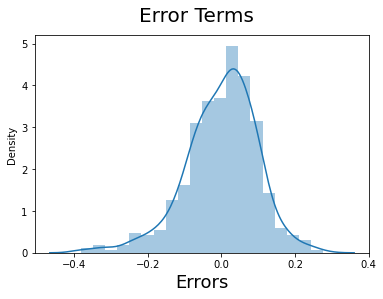

In [489]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)# Plot heading 
plt.xlabel('Errors', fontsize = 18)  # X-label
plt.show()

The error follows normal distribution.Hence we can safely assume the model is correct.

# Analysis on test set

In [490]:
scal_var = ['temp','hum','windspeed','cnt']

bike_test[scal_var] = scaler.fit_transform(bike_test[scal_var])

In [491]:
bike_test.describe()

,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.246575,0.255708,0.264840,0.232877,0.091324,0.059361,0.086758,0.100457,0.077626,0.105023,...,0.652968,0.027397,0.319635,0.479452,0.036530,0.639269,0.546312,0.508750,0.418870,0.516216
std,0.432005,0.437258,0.442259,0.423633,0.288730,0.236840,0.282125,0.301297,0.268194,0.307285,...,0.477117,0.163612,0.467403,0.500722,0.188034,0.481313,0.249189,0.201253,0.188111,0.238702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328479,0.358469,0.283817,0.359882
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.546045,0.494200,0.402533,0.520241
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.759735,0.651165,0.524362,0.682487
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [492]:
y_test = bike_test.pop('cnt')
X_test = bike_test

In [493]:
# Adding constant variable to test dataframe
X_test_m15 = sm.add_constant(X_test)

In [494]:
X_test_m15 = X_test_m15[['const','yr', 'temp','windspeed','weathersit_Clear','season_Fall','mnth_Sep','mnth_Feb','mnth_Jan','weathersit_Light Snow & Rain']]

In [495]:
X_test_m15

,const,yr,temp,windspeed,weathersit_Clear,season_Fall,mnth_Sep,mnth_Feb,mnth_Jan,weathersit_Light Snow & Rain
184,1.0,0,0.837241,0.149393,0,1,0,0,0,0
535,1.0,1,0.911423,0.231142,1,0,0,0,0,0
299,1.0,0,0.496221,0.443398,0,0,0,0,0,0
221,1.0,0,0.890387,0.449707,1,1,0,0,0,0
152,1.0,0,0.821739,0.682387,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0.224955,0.388364,0,0,0,1,0,0
702,1.0,1,0.503971,0.383644,1,0,0,0,0,0
127,1.0,0,0.573725,0.132095,1,0,0,0,0,0
640,1.0,1,0.745342,0.111637,0,0,0,0,0,0


In [496]:
y_pred_m15 = lr15.predict(X_test_m15)

# Model Prediction

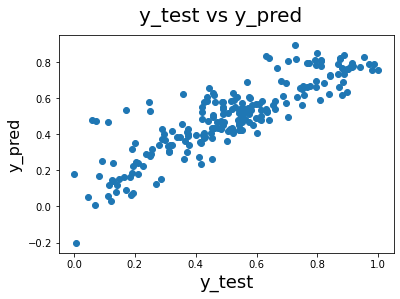

In [497]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m15)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    
plt.show()

The above graph is obtained from the predicted model where we can plot the best fit line

# Calculaing R^2 and Mean Squared Error 

We can see that the equation of our best fitted line is:
cnt=0.1804+0.2356 x yr	+ 0.4889 x temp	-0.1883	x windspeed +0.0743 x weathersit_clear -0.0668 x season_Fall                    +0.0941 x  mnth_Sep -0.1112	x mnth_Feb -0.1392 x mnth_Jan -0.1926 x weathersit_Light Snow & Rain                               

In [498]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m15)

0.7446767090022555

 The calculated r2 value is 0.744

In [499]:
scal_var = ['temp','hum','windspeed','cnt']

bike[scal_var] = scaler.fit_transform(bike[scal_var])

In [500]:
bike.describe()

,season_Fall,season_Spring,season_Summer,season_Winter,mnth_Apr,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,...,weathersit_Clear,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.257534,0.246575,0.252055,0.243836,0.082192,0.084932,0.084932,0.076712,0.084932,0.084932,...,0.634247,0.028767,0.336986,0.500000,0.028767,0.690411,0.543852,0.645400,0.346568,0.516108
std,0.437576,0.431313,0.434490,0.429689,0.274845,0.278971,0.278971,0.266317,0.278971,0.278971,...,0.481971,0.167266,0.473004,0.500343,0.167266,0.462641,0.228140,0.146402,0.159873,0.222735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346084,0.534704,0.232045,0.362143
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.548307,0.643959,0.326928,0.520766
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.743261,0.750535,0.434629,0.683847
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [501]:
X = bike[['yr', 'temp','windspeed','weathersit_Clear','season_Fall','mnth_Sep','mnth_Feb','mnth_Jan','weathersit_Light Snow & Rain']]
X = sm.add_constant(X)
Predicted_count = lr15.predict(X)

In [502]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(bike.cnt, Predicted_count)
r_squared = r2_score(bike.cnt, Predicted_count)

In [503]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.01020681957185758
r_square_value : 0.7939800519667282


Mean Squared Error is 0.0102
R square value is 0.793

# #Actual vs Predicted

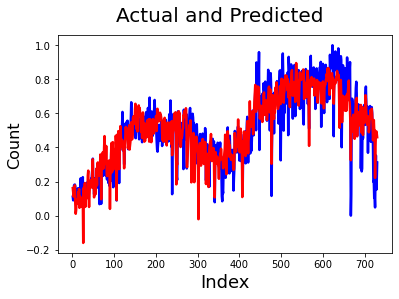

In [504]:
#Actual vs Predicted
c = [i for i in range(1,731,1)]
fig = plt.figure()
plt.plot(c,bike.cnt, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_count, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Count', fontsize=16)                              # Y-label
plt.show()

The predicted values almost pass over the actual values which signifies the correctness of the value.

# Plotting the error terms

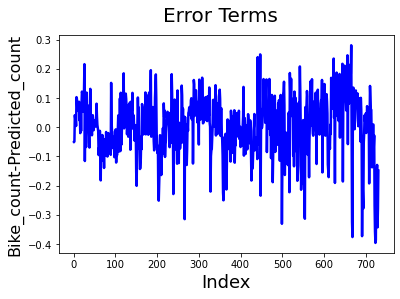

In [505]:
c = [i for i in range(1,731,1)]
fig = plt.figure()
plt.plot(c,bike.cnt-Predicted_count, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Bike_count-Predicted_count', fontsize=16)  
plt.show()

The error is randomly distributed and it is just noise

# Summary

The best fit line
cnt=0.1804+0.2356 x yr+ 0.4889 x temp-0.1883x windspeed +0.0743 x weathersit_clear -0.0668 x season_Fall         
+0.0941 x  mnth_Sep -0.1112	x mnth_Feb -0.1392 x mnth_Jan -0.1926 x weathersit_Light Snow & Rain 

concludes that the year and the temperature are the factors that influence the bike sharing system positively 
with positive coeffecients. 

Clear weather is also positive inluencer in terms of weather, the month september has more positive effect

The season fall has a negative inluence and the months feb and jan has negative coefficients.